In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

In [76]:
results_df = pd.read_csv('transformed_data/results_on_validation_v2.csv', index_col=0)

In [77]:
results_targets = results_df[['target', 'llm_response']]

In [78]:
results_targets = results_targets.dropna()
results_targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2857 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        2857 non-null   int64  
 1   llm_response  2857 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 67.0 KB


In [79]:
results_targets['llm_response'] = results_targets['llm_response'].astype(int)
results_targets['target'] = results_targets['target'].astype(int)

In [80]:
#results_targets = results_targets[results_targets['target'].isin([3, 4, 9])][results_targets['llm_response'].isin([3, 4, 9])]

# 0 = Top / 1 = Trousers / 2 = Long Clothes / 3 = Shoes / 4 = Bag
# results_targets = results_targets.replace({0: 0, 2: 0, 6: 0, 3: 2, 4: 2, 5: 3, 7: 3, 9: 3, 8: 4})

# 0 = Not shoes / 1 = shoes
results_targets = results_targets.replace({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 3, 6: 0, 7: 1, 8: 0, 9: 1, 5: 1})

In [81]:
conf_matrix = confusion_matrix(results_targets['target'], results_targets['llm_response'], labels=results_targets['target'].value_counts().index.tolist())
conf_matrix_df = pd.DataFrame(conf_matrix, index=results_targets['target'].value_counts().index.tolist(), columns=results_targets['target'].value_counts().index.tolist())

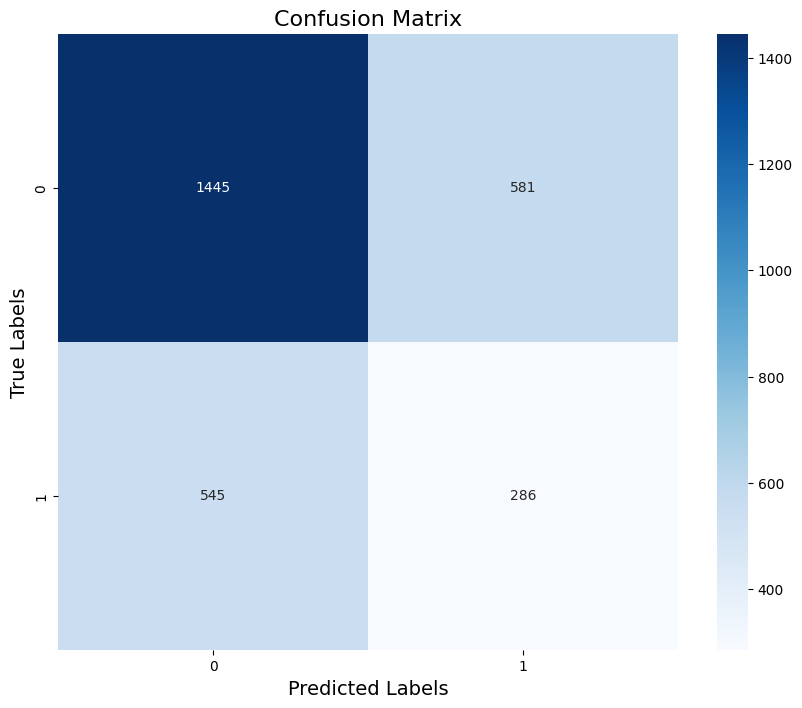

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [83]:
f1_scores = f1_score(results_targets['target'], results_targets['llm_response'], average=None)
print("F1 Scores for each class:", f1_scores)

F1 Scores for each class: [0.71962151 0.3368669 ]


In [84]:
# Micro average
f1_micro = f1_score(results_targets['target'], results_targets['llm_response'], average='micro')
print("Micro-averaged F1 Score:", f1_micro)

# Macro average
f1_macro = f1_score(results_targets['target'], results_targets['llm_response'], average='macro')
print("Macro-averaged F1 Score:", f1_macro)

# Weighted average
f1_weighted = f1_score(results_targets['target'], results_targets['llm_response'], average='weighted')
print("Weighted-averaged F1 Score:", f1_weighted)

Micro-averaged F1 Score: 0.6058802940147008
Macro-averaged F1 Score: 0.5282442080910751
Weighted-averaged F1 Score: 0.6082917686421817
